In [13]:
from sklearn.datasets import load_sample_image
import tensorflow as tf

# Load sample images
china = load_sample_image("china.jpg") / 255
flower = load_sample_image("flower.jpg") / 255

In [14]:
import numpy as np
images = np.array([china,flower])
images.shape

(2, 427, 640, 3)

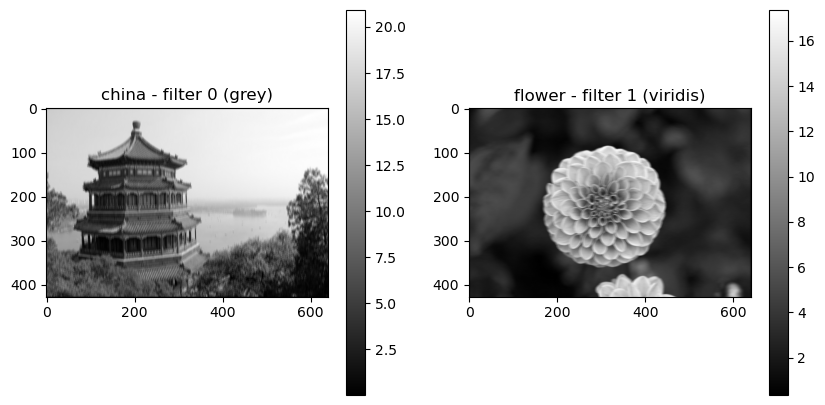

In [15]:
import matplotlib.pyplot as plt
batch_size, height, width, channels = images.shape
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32)
filters[:,3,:,0] =  1
filters[3,:,:,1] = 1
oputput = tf.nn.conv2d(images, filters, strides=[1, 1, 1, 1], padding='SAME')
conv = tf.keras.layers.Conv2D(filters = 32,strides = 1,kernel_size = (7,7),padding='same',activation='relu')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("china - filter 0 (grey)")
plt.imshow(oputput[0, :, :, 0], cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("flower - filter 1 (viridis)")
plt.imshow(oputput[1, :, :, 1], cmap='grey')
plt.colorbar()

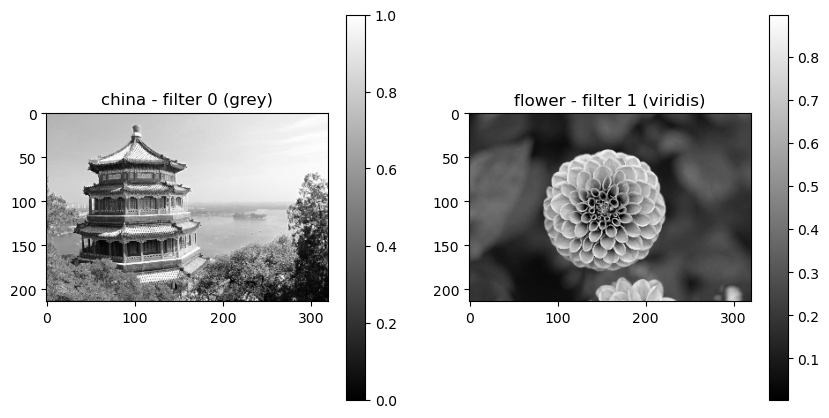

In [16]:
oputput = tf.nn.max_pool(images, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("china - filter 0 (grey)")
plt.imshow(oputput[0, :, :, 0], cmap='gray')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.title("flower - filter 1 (viridis)")
plt.imshow(oputput[1, :, :, 1], cmap='grey')
plt.colorbar()

In [17]:
print("Output shape after convolution:", oputput.shape)

Output shape after convolution: (2, 214, 320, 3)


In [18]:
from tensorflow import keras
global_avg_pool = keras.layers.GlobalAvgPool2D()
global_avg_pool(images).shape

TensorShape([2, 3])

In [19]:
global_avg_pool = keras.layers.Lambda(lambda X: tf.reduce_mean(X, axis=[1, 2]))

Normalized X_train_full min: 0.0, max: 1.0
Normalized X_test min: 0.0, max: 1.0

Training Images Shape after split: (45000, 32, 32, 3), dtype: float64
Validation Images Shape: (5000, 32, 32, 3), dtype: float64
Training Labels Shape: (45000, 1), dtype: uint8
Validation Labels Shape: (5000, 1), dtype: uint8

First 5 Training Labels (should be integers from 0-9): [6 7 9 0 5]
First 5 Validation Labels (should be integers from 0-9): [6 9 9 4 1]


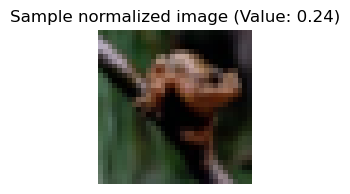

In [20]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt # Make sure this is imported at the top

# --- Your data loading code (from Cell 2) ---
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()
# Define class_names here as it's used in visualization later
class_names = ["airplane", "automobile", "bird", "cat", "deer",
               "dog", "frog", "horse", "ship", "truck"]


# --- Your data preprocessing code (from Cell 3) ---

# !!! IMPORTANT: Ensure this normalization happens BEFORE the train/validation split !!!
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

print(f"Normalized X_train_full min: {X_train_full.min()}, max: {X_train_full.max()}")
print(f"Normalized X_test min: {X_test.min()}, max: {X_test.max()}")

# Create a validation set from the training data
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print(f"\nTraining Images Shape after split: {X_train.shape}, dtype: {X_train.dtype}")
print(f"Validation Images Shape: {X_valid.shape}, dtype: {X_valid.dtype}")
print(f"Training Labels Shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"Validation Labels Shape: {y_valid.shape}, dtype: {y_valid.dtype}")

print(f"\nFirst 5 Training Labels (should be integers from 0-9): {y_train[:5].flatten()}")
print(f"First 5 Validation Labels (should be integers from 0-9): {y_valid[:5].flatten()}")

# Check a sample image after normalization
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])
plt.title(f"Sample normalized image (Value: {X_train[0][0,0,0]:.2f})")
plt.axis('off')
plt.show()

In [21]:
# Normalize pixel values to be between 0 and 1
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0

print(f"Normalized X_train_full min: {X_train_full.min()}, max: {X_train_full.max()}")
print(f"Normalized X_test min: {X_test.min()}, max: {X_test.max()}")

# Create a validation set from the training data
# Using the first 5000 samples for validation
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

print(f"\nTraining Images Shape after split: {X_train.shape}")
print(f"Validation Images Shape: {X_valid.shape}")

Normalized X_train_full min: 0.0, max: 0.00392156862745098
Normalized X_test min: 0.0, max: 0.00392156862745098

Training Images Shape after split: (45000, 32, 32, 3)
Validation Images Shape: (5000, 32, 32, 3)


In [22]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

def build_enhanced_cifar10_model():
    model = keras.models.Sequential([
        # First Convolutional Block with Batch Normalization
        layers.Conv2D(64, 3, padding='same', input_shape=(32, 32, 3)),
        layers.BatchNormalization(), # Add BatchNormalization
        layers.ReLU(),               # Place ReLU after BN

        layers.MaxPooling2D(2), # Output spatial dimensions: 16x16

        # Second Convolutional Block with Batch Normalization
        layers.Conv2D(128, 3, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(128, 3, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(2), # Output spatial dimensions: 8x8

        # Third Convolutional Block with Batch Normalization
        layers.Conv2D(256, 3, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.Conv2D(256, 3, padding='same'),
        layers.BatchNormalization(),
        layers.ReLU(),
        layers.MaxPooling2D(2), # Output spatial dimensions: 4x4

        # Global Average Pooling (stronger regularization, fewer parameters)
        layers.GlobalAveragePooling2D(), # Reduces 4x4x256 features to 256 features

        # Fully Connected (Dense) Layers with Dropout
        # Fewer Dense layers are often needed after GlobalAveragePooling
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.4), # Slightly reduced dropout often works well with BN

        # Output layer for 10 classes (CIFAR-10)
        layers.Dense(10, activation='softmax')
    ])
    return model

print("--- Enhanced Model Summary ---")
model = build_enhanced_cifar10_model()
model.summary()

--- Enhanced Model Summary ---


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_10 (ReLU)                 │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_11 (ReLU)                 │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_12 (ReLU)                 │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_13          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_13 (ReLU)                 │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_14 (ReLU)                 │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_4      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,29

 Total params: 1,145,994 (4.37 MB)

 Trainable params: 1,144,330 (4.37 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [23]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
print("Model compiled successfully.")

Model compiled successfully.


In [24]:
print("Starting model training...")
# You might want to adjust the number of epochs based on your system's performance
# and how the model converges.
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
print("Model training finished.")

Starting model training...
Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 97s 67ms/step - accuracy: 0.3760 - loss: 1.7021 - val_accuracy: 0.0920 - val_loss: 18.6800
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 97s 69ms/step - accuracy: 0.5930 - loss: 1.1455 - val_accuracy: 0.1040 - val_loss: 12.7207
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 98s 70ms/step - accuracy: 0.6660 - loss: 0.9579 - val_accuracy: 0.1228 - val_loss: 3.0787
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 99s 70ms/step - accuracy: 0.7243 - loss: 0.8043 - val_accuracy: 0.1040 - val_loss: 68.0517
Epoch 5/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 100s 71ms/step - accuracy: 0.7606 - loss: 0.7029 - val_accuracy: 0.1554 - val_loss: 2.7456
Epoch 6/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 100s 71ms/step - accuracy: 0.7955 - loss: 0.6029 - val_accuracy: 0.1040 - val_loss: 10.3145
Epoch 7/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 100s 71ms/step - accuracy: 0.8189 - loss: 0.5316 - val_accuracy: 0.1038 - val_loss: 16.6985
Epoch 8/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━

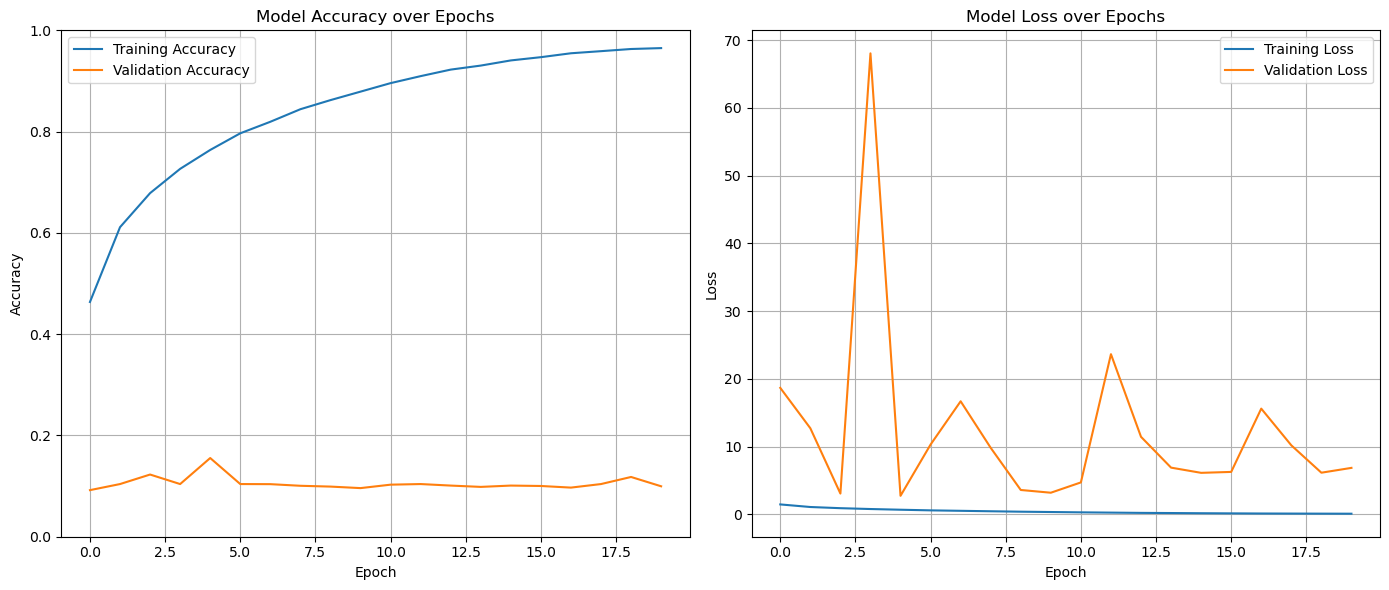

Final Training Accuracy: 0.9649
Final Validation Accuracy: 0.0996
Final Training Loss: 0.1060
Final Validation Loss: 6.8700


In [25]:
# Plotting training and validation accuracy and loss
plt.figure(figsize=(14, 6))

# Plot Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.ylim(0, 1) # Accuracy range from 0 to 1

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Optional: Print final training/validation metrics from history
print(f"Final Training Accuracy: {history.history['accuracy'][-1]:.4f}")
print(f"Final Validation Accuracy: {history.history['val_accuracy'][-1]:.4f}")
print(f"Final Training Loss: {history.history['loss'][-1]:.4f}")
print(f"Final Validation Loss: {history.history['val_loss'][-1]:.4f}")

In [26]:
import tensorflow as tf
from tensorflow import keras

# Assume 'model' is your trained Keras model instance
# (e.g., the 'enhanced_model' or 'resnet_like_model' from previous discussions)

# --- After training your model ---
# For example:
# history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

# 1. Define a filename
model_filename = "my_cifar10_model.keras"

# 2. Save the model
def save_model(model,filename):
    try:
        model.save(model_filename)
        print(f"Model saved successfully to {model_filename}")
    except Exception as e:
        print(f"Error saving model: {e}")

# --- To load the model later ---
def load_model(filename):
    try:
        loaded_model = keras.models.load_model(model_filename)
        print(f"\nModel loaded successfully from {model_filename}")
        loaded_model.summary() # You can check its summary to confirm it's loaded correctly
    except Exception as e:
        print(f"Error loading model: {e}")
save_model(model, model_filename)

Model saved successfully to my_cifar10_model.keras
